<a href="https://colab.research.google.com/github/Rimshay/DEEP-LEARNING/blob/main/Reuters_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.5 Classifying newswires: a multiclass classification example
* you’ll build a network to classify Reuters newswires into 46 mutually exclusive topics
* multi-class classification
* single-label, multiclass classification.
* If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.
## 3.5.1 The Reuters dataset
* publish in 1986
* there are 46 differents topics
* this is available in keras datasets
## Listing 3.12 Loading the Reuters dataset

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
 len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

Here’s how you can decode it back to words, in case you’re curious.

## Listing 3.13 Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
word_index

565248/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [7]:
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') 
     for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[0]

3

The label associated with an example is an integer between 0 and 45—a topic index:

In [9]:
import numpy as np

np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

## 3.5.2 Preparing the data
You can vectorize the data with the exact same code as in the previous example.

## Listing 3.14 Encoding the data

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Change label with one-hot-encode

In [12]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Listing 3.15 Model definition

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## Listing 3.16 Compiling the model

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3.5.4 Validating your approach
Let’s set apart 1,000 samples in the training data to use as a validation set

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Listing 3.18 Training the model
Now, let’s train the network for 20 epochs.

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 79ms/step - loss: 2.5493 - accuracy: 0.5437 - val_loss: 1.6784 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 61ms/step - loss: 1.3795 - accuracy: 0.7063 - val_loss: 1.2810 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 1s 61ms/step - loss: 1.0323 - accuracy: 0.7745 - val_loss: 1.1371 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 62ms/step - loss: 0.8195 - accuracy: 0.8193 - val_loss: 1.0368 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.6554 - accuracy: 0.8609 - val_loss: 0.9941 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 61ms/step - loss: 0.5297 - accuracy: 0.8914 - val_loss: 0.9304 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.4301 - accuracy: 0.9098 - val_loss: 0.9186 - val_accuracy: 0.8100
Epoch 8/20
16

## Listing 3.19 Plotting the training and validation loss

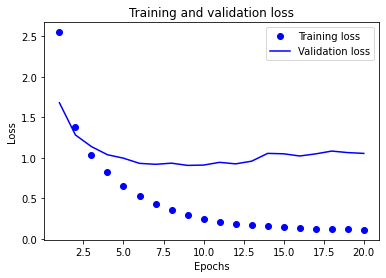

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Listing 3.20 Plotting the training and validation accuracy

In [18]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

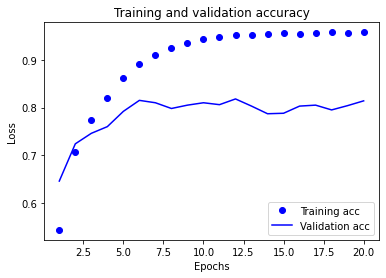

In [19]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Listing 3.21 Retraining a model from scratch

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 73ms/step - loss: 2.5414 - accuracy: 0.5086 - val_loss: 1.7064 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 61ms/step - loss: 1.3855 - accuracy: 0.7114 - val_loss: 1.2910 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 62ms/step - loss: 1.0211 - accuracy: 0.7791 - val_loss: 1.1375 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 62ms/step - loss: 0.8015 - accuracy: 0.8296 - val_loss: 1.0255 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 1s 62ms/step - loss: 0.6395 - accuracy: 0.8681 - val_loss: 0.9662 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 1s 62ms/step - loss: 0.5081 - accuracy: 0.8939 - val_loss: 0.9431 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 1s 62ms/step - loss: 0.4089 - accuracy: 0.9142 - val_loss: 0.9310 - val_accuracy: 0.7970
Epoch 8/9
16/16 [===

In [22]:
results

[1.039611577987671, 0.7796081900596619]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline:

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18833481745325023

## 3.5.5 Generating predictions on new data
Listing 3.22 Generating predictions for new data

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
predictions[0]

array([1.9721776e-05, 9.2522423e-05, 3.7454312e-05, 5.4180068e-01,
       4.5412913e-01, 1.8678133e-05, 2.1241553e-05, 7.2094654e-06,
       5.9757429e-05, 5.0901878e-04, 3.5673129e-05, 6.7995890e-04,
       2.7706215e-05, 7.0381386e-05, 3.6307883e-05, 5.4066868e-07,
       2.1178757e-04, 1.4538923e-04, 3.4716664e-05, 6.2185907e-05,
       5.0243980e-05, 7.0869527e-04, 1.7445143e-06, 1.7897795e-05,
       5.4114248e-06, 4.4592300e-05, 1.4307683e-07, 5.1892484e-06,
       4.7947800e-05, 1.4904591e-05, 7.5718290e-06, 3.8123413e-05,
       2.8801664e-05, 5.5576834e-07, 3.8925380e-05, 2.7745707e-06,
       3.9448441e-04, 3.1179216e-06, 2.2714438e-04, 1.8521886e-04,
       2.5300583e-06, 1.5989110e-04, 3.7614586e-06, 7.5873922e-06,
       1.1020682e-06, 1.6358574e-06], dtype=float32)